<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/Linear_Regression_20_02_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data Set

In [36]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # for linear regression

In [37]:
# Upload dataset - NewspaperData.csv
# Read dataset
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [38]:
# To find out the no. of columns, checking if there are any null values, the datatype of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [39]:
# Explore the data and get basic stats information (mean, std, min, max,etc)
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [40]:
# To get the sum of total null values in each column
data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

Text(0.5, 1.0, 'Scatterplot Sunday vs Daily')

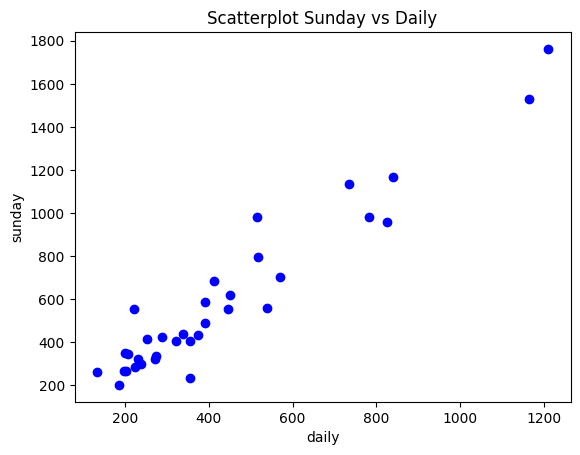

In [41]:
#Scatterplots between independant variable - daily and target variable - sunday
plt.plot(data.daily,data.sunday, "bo") # bo is for blue dots
plt.xlabel("daily")
plt.ylabel("sunday")
plt.title('Scatterplot Sunday vs Daily')

In [42]:
# From the above scatter plot, we can see there is a positive linear association between the variables
# Therefore, the correlation is also going to be positive.
# Apart from scatter plot, we can create other visualizations as well
# Like - box plot, distribution plot, histogram, pair plot

<Axes: xlabel='daily', ylabel='Density'>

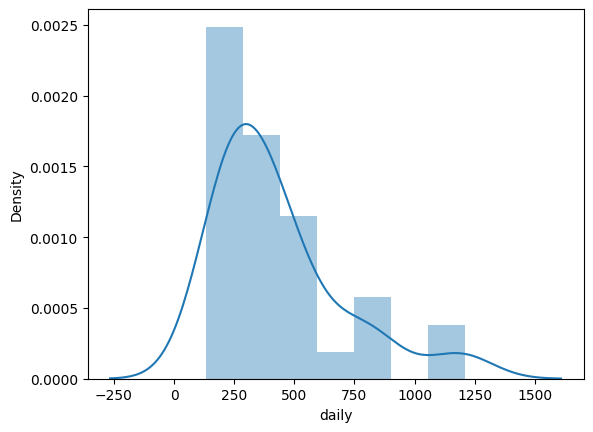

In [43]:
# From the distribution plot we understand, most of the daily circulation is in the range of 125 - 625
# Very few newspapers are having more than 1000 circulations on a daily basis
# Basically we can understand the frequency distribution of the data.
# Where there is more obs - what is that range, where there is less obs - what is that range
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(data['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

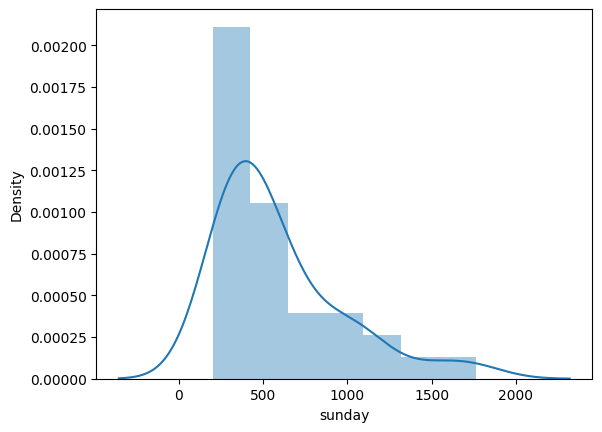

In [44]:
# Similarly we understand the distribution of data for the sunday circulation
sns.distplot(data['sunday'])

<Axes: xlabel='daily', ylabel='sunday'>

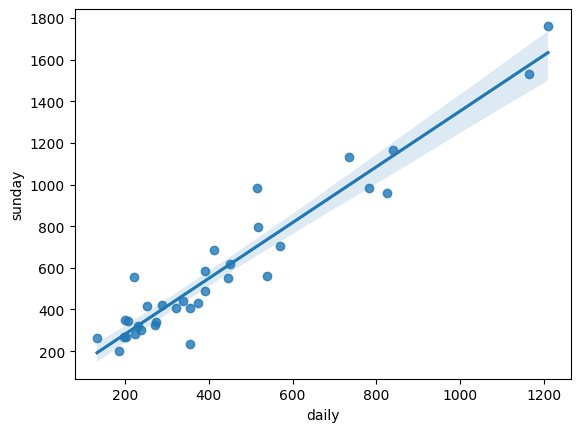

In [45]:
# We then create a regression plot
# It tells us how the regression model is supposed to look like when we are working with daily circulation and sunday circulation
# We get an understanding of what should be the structure of the regression model before we start building the model
sns.regplot(x="daily", y="sunday", data=data)

# Correlation

In [46]:
# We need to drop the newspaper column as its of string datatype and correlation function only works on neumeric datatype
data = data.drop(['Newspaper'],axis=1)

In [47]:
# We are finding out the correlation between our variables before we build the model
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


0.95 - We have a very strong relation between our variables

Fitting a Linear Regression Model

In [48]:
# Fitting the regression model
# We need to import the required function from the statsmodel library
# Now we need to build the model. Code for the same is explained below
# smf.ols <- statsmodels.formula and ols <- ordinary least square method
# smf.ols("_target variable_",data = _dataset_).fit()
model = smf.ols("sunday~daily",data = data).fit()

In [49]:
# We are getting all the information about the model -
# target variable, method used for the model, date-time, no. of obs, df of residuals, df of model, r2 value, adjusted r2 value,
# Bo as coef of intercept and B1 as coef of daily, p-value, etc
# R2 value gives us the accuracy value
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Thu, 23 May 2024   Prob (F-statistic):           6.02e-19
Time:                        08:27:49   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# As the above code gives us all the information where some of the data maybe unnecessary or not required,
# The below codes show us how to calculate the required functions seperately as well

In [51]:
#Coefficients or the Bo and B1 values, i.e, the weights in the equation y= Bo + B1x + e
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [52]:
#t and p-Values
# we compare the p-value of the independant variable with alpha to determine if it is significat
# eg - if the p-value of daily = 6.01 x 10^-19. Then it is less that alpha which is 0.05. Therefore the variable is significat
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [53]:
#R squared values
# the r2 value gives us the accuracy of the model
# the higher the r2 value, the better the model
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# Predict for new data point

In [54]:
# Now we are predicting for random values
# Predict for 200 and 300 daily circulation
# We are creating a list of the random values and converting the values into a pandas series so that it becomes a column
newdata=pd.Series([200,250,350])

In [55]:
# A dataframe is created on top the new column and named as daily
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [56]:
# these values are substituted into the equation y = Bo + B1(x), where we have already have Bo and B1 values and x is substitued with the random values inputed
model.predict(data_pred)

0    281.778581
1    348.764319
2    482.735795
dtype: float64